Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Могу предложить обратить внимание на вот этот курс: https://vk.com/dlschool_mipt

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что проект хорошо структурирован. Приятно проверять такие работы.
* Я оставил несколько советов. Пожалуйста, обрати на них внимание.
* Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Артем, привет! Все ясно. Поехали!
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!

# Определение возраста покупателей

In [1]:
import pandas as pd
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50

## Исследовательский анализ данных

**Откроем и посмотрим на датафрейм**

In [2]:
df = pd.read_csv('/datasets/faces/labels.csv')
df.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


**Оценим выборки**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Всего 7591 не пустых записей

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно. Хорошо, что ты не забываешь про первичный осмотр загруженного файла!
</div>

**Посмотрим на распределение возраста по выборке**

[Text(0, 0.5, 'Количество значений')]

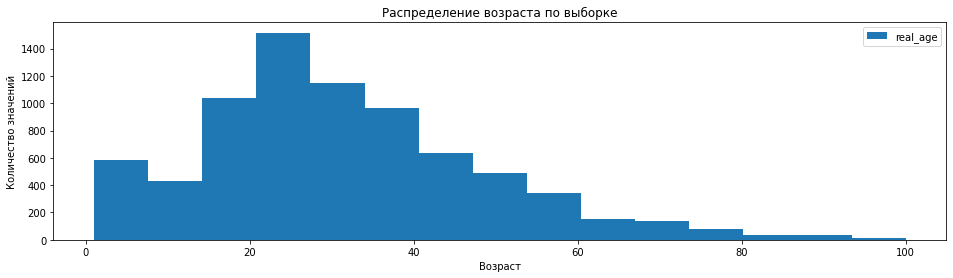

In [16]:
ax = df.plot(kind='hist', bins = 15, figsize = (16, 4), title = 'Распределение возраста по выборке')
ax.set(xlabel = 'Возраст')
ax.set(ylabel = 'Количество значений')

медиана лежит в районе30 лет. Отрицательных возрастов нет, 100500-летних долгожителей тоже. В целом все как-будто ок

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно поработать над оформлением графика (количество столбиков).
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Не совсем понятно в какую сторону ты предлоагаешщь изменить количество столбиков. Я пробовал разыне значения и 20 мне показалось оптимальным - не очень "рубленный" и не очень "рваный" вид. Сейчас сделал чуть меньше - 15. Стало более равномерно, при этом всплеск в райное от года еще виден. (при 10-ти - уже нет)
</div>

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> Я бы увеличил до 100. Тогда можно было бы увидеть пики в круглых датах. 
</div>

**Оценим количество уникальных значений**

In [17]:
print('В выборке уникальных значений всего:', len(df['real_age'].unique()))

В выборке уникальных значений всего: 97


**Распечатаем первые 15 изображений**

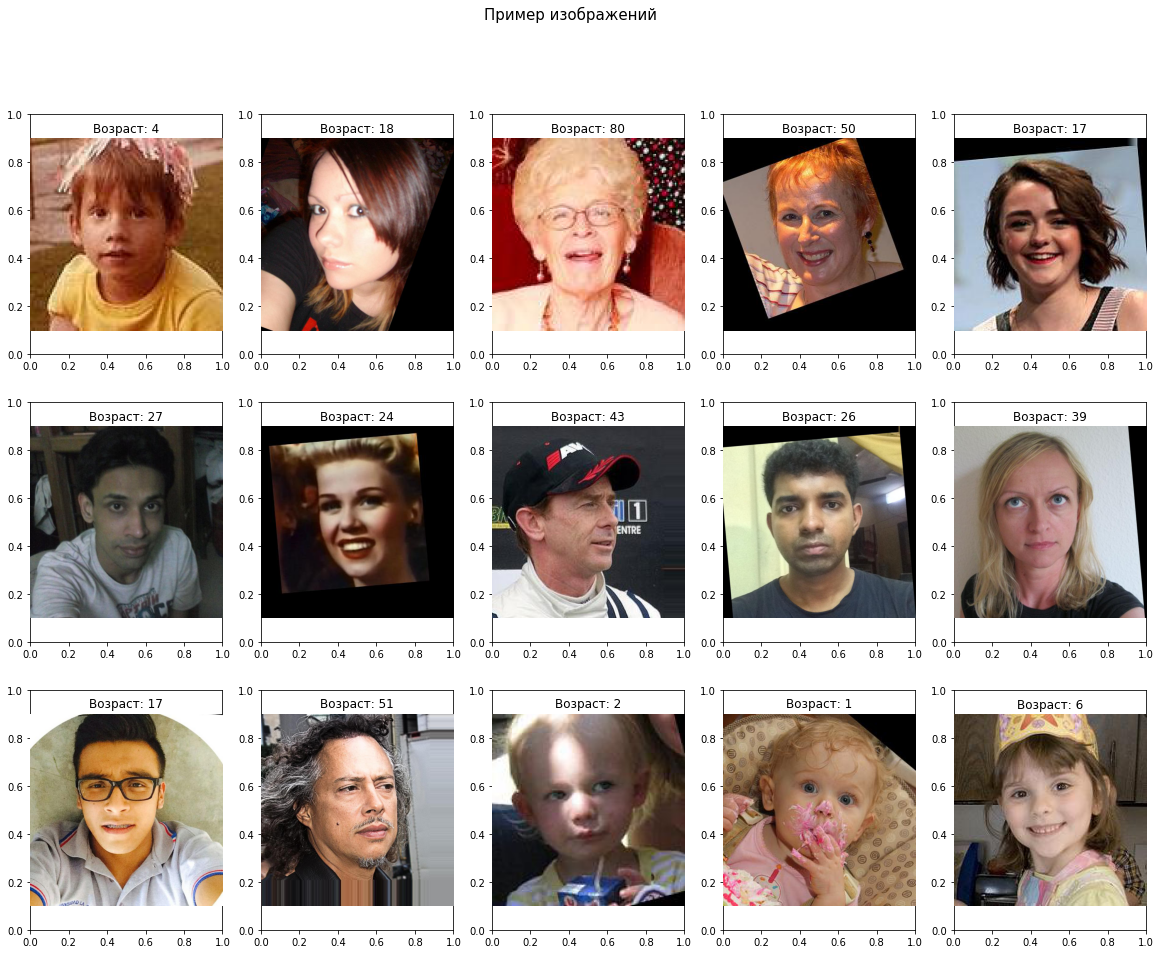

In [42]:
title = 'Пример изображений'

fig, axes = plt.subplots(3, 5, figsize=(20, 15)) # размещаем в 2 строки и 5 столбцов

for i, img in enumerate(df['file_name'].head(15).tolist()):
    image = Image.open('/datasets/faces/final_files/' + img)
    age = df.at[i,'real_age']
    fig.add_subplot(3, 5, i+1).set_title('Возраст: '+ str(age))
    plt.axis('off')    
    
    plt.imshow(np.array(image))
    fig.suptitle(title, fontsize=15)

plt.show()

<div class="alert alert-block alert-info">
<b>Совет: </b> В названиях (title) изображений можно указать возраст, а оси удалить
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Отличная мысль про возраст! Добавил. Оси смог удалить только частично. Есть идеи как их полностью "грохнуть"?
</div>

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> Надо еще у всех axes (в plt.subplots) аналогичным образом убрать оси.
</div>

**Оценим размеры исходных изображений**

In [44]:
for i, img in enumerate(df['file_name'].head(15).tolist()):
    image = Image.open('/datasets/faces/final_files/' + img)
    
    print(f'Размер {i+1}-го изображения:', np.array(image).shape)

Размер 1-го изображения: (114, 114, 3)
Размер 2-го изображения: (784, 784, 3)
Размер 3-го изображения: (133, 133, 3)
Размер 4-го изображения: (370, 370, 3)
Размер 5-го изображения: (212, 212, 3)
Размер 6-го изображения: (636, 637, 3)
Размер 7-го изображения: (412, 412, 3)
Размер 8-го изображения: (311, 311, 3)
Размер 9-го изображения: (898, 897, 3)
Размер 10-го изображения: (724, 724, 3)
Размер 11-го изображения: (636, 636, 3)
Размер 12-го изображения: (803, 803, 3)
Размер 13-го изображения: (155, 155, 3)
Размер 14-го изображения: (321, 321, 3)
Размер 15-го изображения: (203, 204, 3)


## Обучение модели

**Код обучения модели**

```python

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

def create_model(input_shape):

    backbone = ResNet50(weights='imagenet',
                        input_shape=input_shape,
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    # для регресии нужен 1 нейрон. создадим слой с ним
    # Положительные прогнозы сети функция ReLU не меняет, а все отрицательные — приводит к нулю. Чисел меньше 0 быть не может.
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(lr=0.0003)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=5,
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch == None:
        steps_per_epoch = len(train_data)
    if validation_steps == None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model```

**Результат вывода на экран. Короткая версия**

```
Found 5694 validated image filenames.
Found 1897 validated image filenames.
Train for 356 steps, validate for 119 steps
Epoch 1/5
356/356 - 99s - loss: 196.0754 - mean_absolute_error: 10.5405 - val_loss: 377.2642 - val_mean_absolute_error: 14.4819
Epoch 2/5
356/356 - 45s - loss: 113.3892 - mean_absolute_error: 8.1150 - val_loss: 321.9805 - val_mean_absolute_error: 13.4641
Epoch 3/5
356/356 - 47s - loss: 83.8259 - mean_absolute_error: 7.0074 - val_loss: 169.0341 - val_mean_absolute_error: 10.2891
Epoch 4/5
356/356 - 50s - loss: 71.1622 - mean_absolute_error: 6.4179 - val_loss: 88.8265 - val_mean_absolute_error: 7.1951
Epoch 5/5
356/356 - 53s - loss: 57.6344 - mean_absolute_error: 5.7986 - val_loss: 84.5226 - val_mean_absolute_error: 7.0753
119/119 - 10s - loss: 84.5226 - mean_absolute_error: 7.0753
Test MAE: 7.0753
```

**Результат вывода на экран. Полная версия**

```

2022-09-03 18:17:21.677342: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2022-09-03 18:17:21.679074: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2022-09-03 18:17:22.543914: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-09-03 18:17:22.553635: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-09-03 18:17:22.553700: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-09-03 18:17:22.553733: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-09-03 18:17:22.555528: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-09-03 18:17:22.555890: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-09-03 18:17:22.557931: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-09-03 18:17:22.559068: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-09-03 18:17:22.559122: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-09-03 18:17:22.563464: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2022-09-03 18:17:23.186606: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-09-03 18:17:23.192909: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2100000000 Hz
2022-09-03 18:17:23.193389: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x50d8cb0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-09-03 18:17:23.193417: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-09-03 18:17:23.391707: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4738fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-09-03 18:17:23.391743: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2022-09-03 18:17:23.394120: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-09-03 18:17:23.394186: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-09-03 18:17:23.394199: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-09-03 18:17:23.394230: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-09-03 18:17:23.394239: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-09-03 18:17:23.394249: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-09-03 18:17:23.394260: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-09-03 18:17:23.394271: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-09-03 18:17:23.399099: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2022-09-03 18:17:23.399172: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-09-03 18:17:26.504486: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-09-03 18:17:26.504528: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2022-09-03 18:17:26.504535: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2022-09-03 18:17:26.509251: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-09-03 18:17:26.509300: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 1s
 
 < Далее идут, как я понял, те самые длинные строки со скачиванием. Их как и просили - удалил.>
  
93184000/94765736 [============================>.] - ETA: 0s
94773248/94765736 [==============================] - 8s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/5
2022-09-03 18:17:58.573582: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-09-03 18:17:59.004022: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 99s - loss: 196.0754 - mean_absolute_error: 10.5405 - val_loss: 377.2642 - val_mean_absolute_error: 14.4819
Epoch 2/5
356/356 - 45s - loss: 113.3892 - mean_absolute_error: 8.1150 - val_loss: 321.9805 - val_mean_absolute_error: 13.4641
Epoch 3/5
356/356 - 47s - loss: 83.8259 - mean_absolute_error: 7.0074 - val_loss: 169.0341 - val_mean_absolute_error: 10.2891
Epoch 4/5
356/356 - 50s - loss: 71.1622 - mean_absolute_error: 6.4179 - val_loss: 88.8265 - val_mean_absolute_error: 7.1951
Epoch 5/5
356/356 - 53s - loss: 57.6344 - mean_absolute_error: 5.7986 - val_loss: 84.5226 - val_mean_absolute_error: 7.0753
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 84.5226 - mean_absolute_error: 7.0753
Test MAE: 7.0753

```

<div class="alert alert-block alert-success">
<b>Успех:</b> Модель определена верно. Отлично, что аугменатция была применена только к тренировочной части данных!
</div>

## Анализ обученной модели

В рамках текущего проекта были проведены следующие работы:

1. Проведен предварительный анализ данных. 

на данном этапе было определено:
- определен размер исходного датасета - 7591 изображений
- 97 уникальных значений целевой переменной
- распределение нормальное со скосом вправо. Медианное значение в районе 30 лет.
- размер исходных изображений варьируется в широких пределах (на первых 15-ти изображениях размеры лежат в диапазоне от 114x114 до 898x898)

**Вывод по этапу предварительного анализа:** данные - валидные.

2. Обучена свёрточная нейронная сеть на базе архитектуры ResNet50 и решена задача регрессии.

- Для обучения использовано 5694 изображений
- Для валидации использовано 1897 изображений
- Обучение произведено на 5-ти эпохах, при этом видно что между 4-й и 5-й сильного прироста в качестве уже нет (значит количество эпох корректное)
- Значение заданной метрики mean_absolute_error достигло необходимого порога и составляет 7.0753. 

**Вывод по этапу обучения нейронной сети**
Поставленная задача выполнена. Модель работает. Модель в среднем ошибается с определением возраста на 7 лет, что в целом мне кажется весьма неплохим результатом. (не уверен что я сам смогу угадывать возраст лучше :) 

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть подробный вывод в конце проекта!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Приятно, что оценил, потому что над выводом пришлось потрудиться..)
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы